<a href="https://colab.research.google.com/github/LiterallyRicky/DataScience-A2/blob/main/Rick_RiveU2proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Unit 2 Project: "Did films released this month have an average rating above a 7/10?"**

Here's a deep dive into movies released this month and their average corresponding ratings :).  But first, the following will be installiations and libraries needed for the code later on in the project.

In [ ]:
!pip install preliz

In [ ]:
#Here we're going to import preliz, we'll name it pz to shorten to recall this later in my code.
#You'll see this later on with other libraries too.
import preliz as pz

In [ ]:
import numpy as np
import arviz as az
import pymc as pm

##**Prior + Previous Knowledge:**##

Using [IMDb's website](https://www.imdb.com/search/title/?title_type=feature&release_date=2024-09-01,2024-09-11) to search up all the movies released this month, there have been about 456 movies released from the beginning of September 1st, 2024 to September 11th, 2024. Although, for some weird reason, IMDb sometimes doesn't exclude movies that haven't been released yet and doesn't exclude movies that were released but haven't been reviewed yet. To exclude these movies, I went through every movie that wasn't rated yet and excluded them from the 456 movies initially gathered. Excluding the movies that were not yet rated makes it easier since unrated movies could be outstanding and rated above a 7/10, so 262 movies were not rated/released yet. In reality, it's a dataset of 194 movies instead of 456.

 For further context, according to a distribution made by [Alex Olteanu - a data scientist](https://www.freecodecamp.org/news/whose-reviews-should-you-trust-imdb-rotten-tomatoes-metacritic-or-fandango-7d1010c6cf19/), the average ratings made by IMDb of 4917 movie ratings, was around the 6 to 7 out of 10 ratings. So, for a smaller dataset (194 movies) compared to the 4917 movies, it would be interesting to see if the ratings would differ.

## **Before looking at Data + Context:**
For this project, the goal is to explore whether the average rating of films released in this month -- the first 11 days of September (as of writing this, it's Sep. 11, 2024). Before viewing any data, I made an assumption based on viewing ads for releasing movies and using social media. From what I've seen, I assume that the movies released from September 1st to September 11th will have ratings that are lower than 7/10.

I'll say that films released this month recieved an average of around a 6/10 rating. I'll provide a beta distribution:

<Axes: >

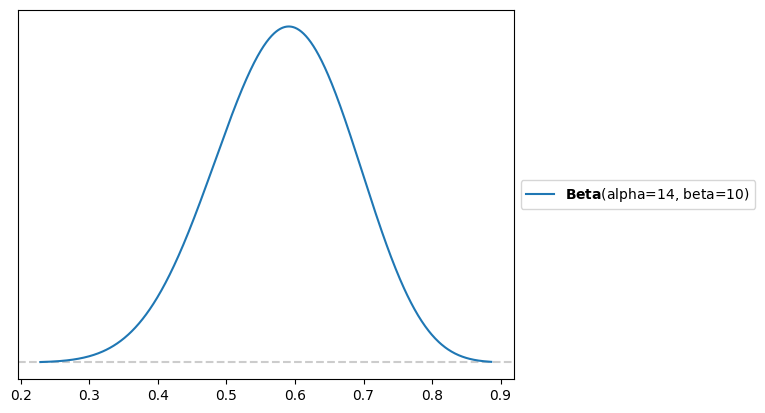

In [ ]:
#creation of a beta distribtution, where you'll see the visual following the code
#run it!
pz.Beta(alpha=14,beta=10).plot_pdf()

#**Note:**#
- We're using the Beta distribution since it's used to analyze probabilistic experiments that only have two possible outcomes. In our case, our two outcomes would be only yes or no!
- This beta distribution shows my predictions of how the ratings will average.
- My predictions were that films released this month will have a ~6/10 rating average rather than a 7/10 or higher.
- This distribution is bound to change due to likelihood and the posterior around the end.

##**Gathered Information from Dataset (Likelihood)**:##


Recall that 138 movies were rated above a 7/10 out of 194 movies.

Given our prior beliefs, we want to find the probability of this occurring. To do this, we'll make a Binomial distribution to model the likelihood, which will represent the number of films that received ratings above 7/10 out of the total number of films released.

Next, we'll use the conditional probability equation: $p(y|θ)$. Where:
- $y$ represents the number of films with ratings above 7/10, which in this case is 138
- $θ$ being the probability that a film released this month received a rating above 7/10.

Next, let's set up a distribution with this information now. (shown below!)

<Axes: >

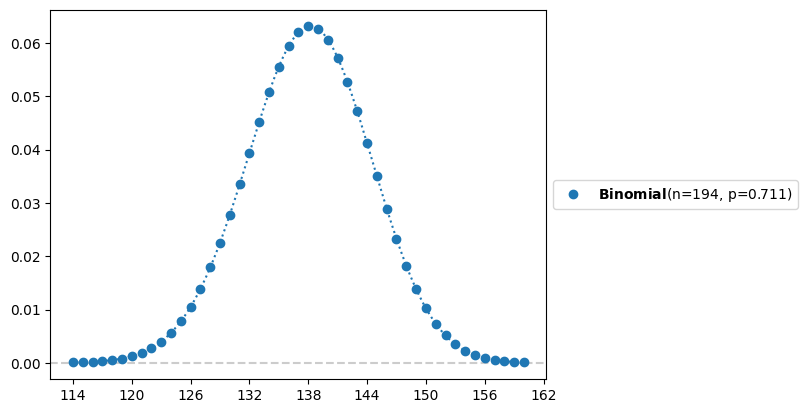

In [ ]:
pz.Binomial(n=194, p=138/194).plot_pdf()
#n = total number of films
#p = probability

This likelihood function shown above allows us to update our prior beliefs, which we modeled as a Beta distribution, with the new data provided by IMDb's website. The binomial distribution is used to figure the probability of a pass or fail outcome, or if an experiment needs to be replicated numerous times. It helps refine my estimate of the true probability that films released this month received ratings above 7/10.

Before we go on, let's review what we just did.

First:
- We began by defining our prior distribution for the probability of films released this month with a rating below 7/10. We used a beta distribution with parameters of: $p(θ) = Beta(𝜶 = 14, 𝛽 = 10)$

Second:
- We identified a formula for the likelihood that represents the number of films that received ratings above 7/10 out of the total number of movies released. $p(𝒚|θ) = Binomal(n = 194, k = 138, θ)$

## **Analytical Model Distribution**


By multiplying both formulas for prior and likelihood, we get -> $Beta(𝜶_{new} = a + k, 𝛽_{new} = n - k + 𝛽)$. This gives us a function that allows us to use previous information and variables from the prior and likelihood to take in new information into account. Ultimately, we're updating previous beliefs from both distributions made earlier.

In [ ]:
#starting off by using previous information/
#parmeters used in previous distributions
#prior parmeters
alpha_prior = 14
beta_prior = 10

#likelihood parmeters
n = 194
k = 138

#mathmatical formula to find the posterior/later going to be
#used for our posterior distribution, the same one I described
#above
analytic_ratings = pz.Beta(alpha_prior + k,beta = beta_prior + n - k)

#calling for the mean of our Beta distribution graph
analytic_ratings.mean()


0.6972477064220184

<Axes: >

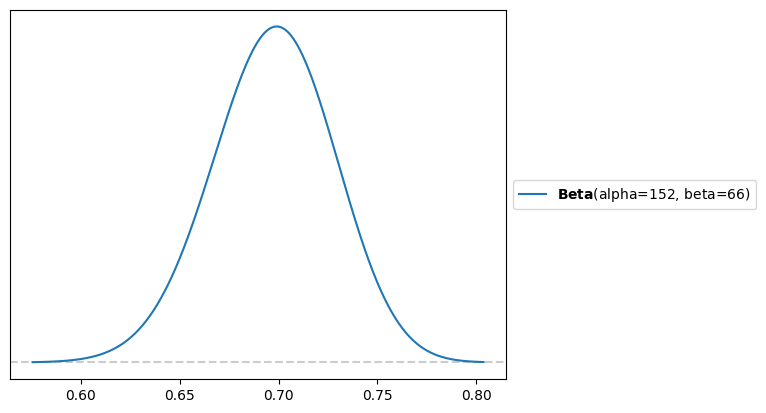

In [ ]:
#plotting the distribution now
analytic_ratings.plot_pdf()

# **PyMC Model**

In this section, we'll be diving into a PyMC Model -- aiming to estimate the probability that a movie released this month recieved a rating above 7/10. In our case we have:
- Our prior beliefs
  - $𝜶 = 14, 𝛽 = 10$
- Data from IMDb website - 138/194
  - 138 - number of movies that had more than a 7/10 rating
  - 194 - total number of movies released in this month

In [ ]:
#at the beginning of our project, we had already imported pymc
#138 = movies rated above 7/10 (represented as 1's)
#56 = movied that have a rating below or equal to a 7/10 (represented as 0's)
reviews_data = np.repeat([1,0], repeats = [138,56])

In [ ]:
with pm.Model() as movie_reviews_model: #starts by defining our Bayesian model
#alpha and beta values are from prior distribution
  θ = pm.Beta('θ' , alpha = 14. , beta = 10.)
  y = pm.Bernoulli('y', p = θ, observed = reviews_data) #defines the likelihood function using a Bernoulli distribution
  idata_reviews = pm.sample(2000) #produced 2000 samples-
  #to create a more comprehensive and accurate model

<Axes: title={'center': 'θ'}>

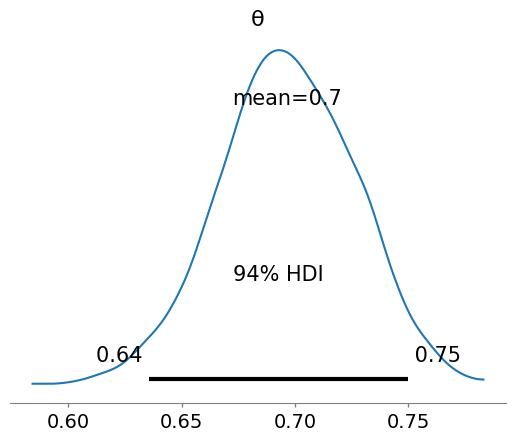

In [ ]:
az.plot_posterior(idata_reviews)
#plotting the posterior

##**Final Comments/Overview**
Compared to my prior distribution, our PyMC model has the same shape and mean but the scaling was a bit off compared to the analytic model. To be transparent, the PyMC model doesn't surprise me. It shows a mean of 0.7, which, compared to my beliefs and to the article I read about the average ratings of a large dataset the[ data scientist](https://www.freecodecamp.org/news/whose-reviews-should-you-trust-imdb-rotten-tomatoes-metacritic-or-fandango-7d1010c6cf19/) dived into, are similar to the distribution of the data scientist. I wasn't sure if the ratings would be close to 0.6, so I widened the distribution to not a specific mean. Overall, the PyMC model is somewhat accurate to my prior beliefs.